# **UN SDG - NLP classification task**

## **1. Introduction and loading**

### i. Introduction

***What is NLP?***
It is a subfield of artificial intelligence (AI). It helps machines process and understand the human language so that they can automatically perform repetitive tasks.

**Libaries to be used**
> `NLTK`

NLTK - natural language toolkit - is a leading library for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning (more on this stuff below), wrappers for industrial-strength NLP libraries, and an active discussion forum.

> `Sklearn`

Alson known as Scikit-learn. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

> `Pandas`

It is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language

> `Numpy`

**NumPy** offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more





### ii. Loading
**Importing libraries**

In [1]:
import nltk
import numpy as np
import pandas as pd

from nltk.tokenize import TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

**Loading data**

In [3]:
data = pd.read_csv('train.csv')
data.head()

doi                           text_id  \
0               10.18356/5950d914-en  bf7763beb5ad7a16764d1b7fa87ab018   
1               10.18356/5950d914-en  b6415a528064b85fdde4b4c61239ed3a   
2               10.18356/31959a6d-en  29127def7e81b999b87c8e887a4fe882   
3  10.1787/eco/surveys-cze-2014-6-en  459db322b9e44630320fda76783e0f69   
4        10.1787/9789264119536-11-en  8b7d8c6c605fe9695d08ab03d601e0e9   

                                                text  sdg  labels_negative  \
0  Indicators for targets 9.b and 9.c have data a...    9                4   
1  Manufacturing value added as a percentage of G...    9                0   
2  To Share or Not to Share: That is the Question...    5                2   
3  As of 2004, parents can work without losing th...    4                2   
4  A question of considerable policy relevance is...   10                1   

   labels_positive  agreement  id  
0                5   0.111111   1  
1                3   1.000000   2  
2                7   0.555556   3  
3                2   0.000000   4  
4                4   0.600000   5

**The first and the last 5 records**


In [4]:
data.head()

doi                           text_id  \
0               10.18356/5950d914-en  bf7763beb5ad7a16764d1b7fa87ab018   
1               10.18356/5950d914-en  b6415a528064b85fdde4b4c61239ed3a   
2               10.18356/31959a6d-en  29127def7e81b999b87c8e887a4fe882   
3  10.1787/eco/surveys-cze-2014-6-en  459db322b9e44630320fda76783e0f69   
4        10.1787/9789264119536-11-en  8b7d8c6c605fe9695d08ab03d601e0e9   

                                                text  sdg  labels_negative  \
0  Indicators for targets 9.b and 9.c have data a...    9                4   
1  Manufacturing value added as a percentage of G...    9                0   
2  To Share or Not to Share: That is the Question...    5                2   
3  As of 2004, parents can work without losing th...    4                2   
4  A question of considerable policy relevance is...   10                1   

   labels_positive  agreement  id  
0                5   0.111111   1  
1                3   1.000000   2  
2                7   0.555556   3  
3                2   0.000000   4  
4                4   0.600000   5

In [5]:
data.tail()

doi                           text_id  \
25939        10.18356/2d07fa8a-en  eb5757e9da9a0b61a2d8a2bd352f34ce   
25940        10.18356/daadf51f-en  2bdeee9dff95a4a110cbb75648582558   
25941  10.1787/9789264235151-4-en  0754b035be2628e9a06afea711a04fec   
25942  10.1787/9789264209138-3-en  7dae9220a2463cc1d2b2513c032317a8   
25943  10.1787/9789264225817-4-en  ba5110491496e704b7aadf7a9def3bb3   

                                                    text  sdg  \
25939  But, in general, such programmes neither targe...    2   
25940  Concentration of refugees in remote camps, as ...    4   
25941  Designating 3.8 million ha for rice production...    2   
25942  Figure 1.1 proposes a simplified framework tha...    6   
25943  Experience from other OECD countries has shown...    3   

       labels_negative  labels_positive  agreement     id  
25939                0                3   1.000000  25940  
25940                1                8   0.777778  25941  
25941                0                9   1.000000  25942  
25942                1                2   0.333333  25943  
25943                0                9   1.000000  25944

**The number of records and columns**

In [6]:
data.shape

(25944, 8)

**Columns**

In [7]:
data.columns.to_list()

['doi',
 'text_id',
 'text',
 'sdg',
 'labels_negative',
 'labels_positive',
 'agreement',
 'id']

## Data Pre-processing

### i. Drop Observations

In [8]:
data_new=data[data['agreement']>0.6]
data_new.head()

doi                           text_id  \
1         10.18356/5950d914-en  b6415a528064b85fdde4b4c61239ed3a   
7   10.6027/9789289350433-5-en  1cd35b929d9d744b60c2c2a7dc8575fe   
8      10.1787/5jlwvz85537c-en  439857f2a5cb22fc9f73878bf6149316   
10         10.1787/dd4dcfa6-en  5704235f970c76906e29032a2ee7f22b   
12  10.1787/9789264270985-7-en  88a1c7d464839dd2f7eb8b4060074607   

                                                 text  sdg  labels_negative  \
1   Manufacturing value added as a percentage of G...    9                0   
7   Further, capacity building (cf. The text on ad...   13                1   
8   One method to induce a sensation of travelling...   11                0   
10  The structure of the benefit is progressive an...    1                1   
12  The approach in this framework is that the bas...    3                0   

    labels_positive  agreement  id  
1                 3   1.000000   2  
7                 8   0.777778   8  
8                 3   1.000000   9  
10                8   0.777778  11  
12                7   1.000000  13

In [9]:
data_new.shape

(15076, 8)

### ii. Drop Columns

In [10]:
columns=['doi', 'text_id', 'labels_negative', 'labels_positive', 'agreement']
df_train=data_new.drop(columns, axis=1)

In [11]:
df_train=df_train.set_index('id')
df_train.head()

text  sdg
id                                                        
2   Manufacturing value added as a percentage of G...    9
8   Further, capacity building (cf. The text on ad...   13
9   One method to induce a sensation of travelling...   11
11  The structure of the benefit is progressive an...    1
13  The approach in this framework is that the bas...    3

### iii. Natural Language Processing

### Text Cleaning

- Lowercase Conversion
- Remove Punctuations
- Tokenization
- Remove stop words
- Stemming
- Lemmatizaton

#### Convert to Lowercase

In [12]:
df_train['text'] = df_train['text'].str.lower()
df_train.head()

text  sdg
id                                                        
2   manufacturing value added as a percentage of g...    9
8   further, capacity building (cf. the text on ad...   13
9   one method to induce a sensation of travelling...   11
11  the structure of the benefit is progressive an...    1
13  the approach in this framework is that the bas...    3

#### Remove Punctuation and Digits

In [13]:
def remove_punct(words):
    text=[]
    words=words.split()
    for word in words:
        text.append(''.join([l for l in word if l.isalpha()]))
    return ' '.join(text)

df_train['text_punct']=df_train['text'].apply(remove_punct)
df_train.head()

text  sdg  \
id                                                           
2   manufacturing value added as a percentage of g...    9   
8   further, capacity building (cf. the text on ad...   13   
9   one method to induce a sensation of travelling...   11   
11  the structure of the benefit is progressive an...    1   
13  the approach in this framework is that the bas...    3   

                                           text_punct  
id                                                     
2   manufacturing value added as a percentage of g...  
8   further capacity building cf the text on adapt...  
9   one method to induce a sensation of travelling...  
11  the structure of the benefit is progressive an...  
13  the approach in this framework is that the bas...

### Tokenization

In [14]:
tokeniser = TreebankWordTokenizer()
df_train['text_token'] = df_train['text_punct'].apply(tokeniser.tokenize)
df_train.head()

text  sdg  \
id                                                           
2   manufacturing value added as a percentage of g...    9   
8   further, capacity building (cf. the text on ad...   13   
9   one method to induce a sensation of travelling...   11   
11  the structure of the benefit is progressive an...    1   
13  the approach in this framework is that the bas...    3   

                                           text_punct  \
id                                                      
2   manufacturing value added as a percentage of g...   
8   further capacity building cf the text on adapt...   
9   one method to induce a sensation of travelling...   
11  the structure of the benefit is progressive an...   
13  the approach in this framework is that the bas...   

                                           text_token  
id                                                     
2   [manufacturing, value, added, as, a, percentag...  
8   [further, capacity, building, cf, the, text, o...  
9   [one, method, to, induce, a, sensation, of, tr...  
11  [the, structure, of, the, benefit, is, progres...  
13  [the, approach, in, this, framework, is, that,...

### Remove Stop Words

In [15]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]
df_train['text_stop']=df_train['text_token'].apply(remove_stop_words)
df_train.head()

text  sdg  \
id                                                           
2   manufacturing value added as a percentage of g...    9   
8   further, capacity building (cf. the text on ad...   13   
9   one method to induce a sensation of travelling...   11   
11  the structure of the benefit is progressive an...    1   
13  the approach in this framework is that the bas...    3   

                                           text_punct  \
id                                                      
2   manufacturing value added as a percentage of g...   
8   further capacity building cf the text on adapt...   
9   one method to induce a sensation of travelling...   
11  the structure of the benefit is progressive an...   
13  the approach in this framework is that the bas...   

                                           text_token  \
id                                                      
2   [manufacturing, value, added, as, a, percentag...   
8   [further, capacity, building, cf, the, text, o...   
9   [one, method, to, induce, a, sensation, of, tr...   
11  [the, structure, of, the, benefit, is, progres...   
13  [the, approach, in, this, framework, is, that,...   

                                            text_stop  
id                                                     
2   [manufacturing, value, added, percentage, gdp,...  
8   [capacity, building, cf, text, adaptation, rat...  
9   [one, method, induce, sensation, travelling, h...  
11  [structure, benefit, progressive, consequently...  
13  [approach, framework, basis, measurement, cont...

### Stemming

In [16]:
#function to stem our words
def return_stemmer(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]
df_train['text_stemmed'] = df_train['text_stop'].apply(return_stemmer)
df_train.head()

text  sdg  \
id                                                           
2   manufacturing value added as a percentage of g...    9   
8   further, capacity building (cf. the text on ad...   13   
9   one method to induce a sensation of travelling...   11   
11  the structure of the benefit is progressive an...    1   
13  the approach in this framework is that the bas...    3   

                                           text_punct  \
id                                                      
2   manufacturing value added as a percentage of g...   
8   further capacity building cf the text on adapt...   
9   one method to induce a sensation of travelling...   
11  the structure of the benefit is progressive an...   
13  the approach in this framework is that the bas...   

                                           text_token  \
id                                                      
2   [manufacturing, value, added, as, a, percentag...   
8   [further, capacity, building, cf, the, text, o...   
9   [one, method, to, induce, a, sensation, of, tr...   
11  [the, structure, of, the, benefit, is, progres...   
13  [the, approach, in, this, framework, is, that,...   

                                            text_stop  \
id                                                      
2   [manufacturing, value, added, percentage, gdp,...   
8   [capacity, building, cf, text, adaptation, rat...   
9   [one, method, induce, sensation, travelling, h...   
11  [structure, benefit, progressive, consequently...   
13  [approach, framework, basis, measurement, cont...   

                                         text_stemmed  
id                                                     
2   [manufactur, valu, ad, percentag, gdp, stood, ...  
8   [capac, build, cf, text, adapt, rather, concep...  
9   [one, method, induc, sensat, travel, high, spe...  
11  [structur, benefit, progress, consequ, almost,...  
13  [approach, framework, basi, measur, contact, h...

### Lemmatization

In [17]:
#function to lemmatize our words
def return_lemmer(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]
df_train['text_lemmatized'] = df_train['text_stop'].apply(return_lemmer)
df_train.head()

text  sdg  \
id                                                           
2   manufacturing value added as a percentage of g...    9   
8   further, capacity building (cf. the text on ad...   13   
9   one method to induce a sensation of travelling...   11   
11  the structure of the benefit is progressive an...    1   
13  the approach in this framework is that the bas...    3   

                                           text_punct  \
id                                                      
2   manufacturing value added as a percentage of g...   
8   further capacity building cf the text on adapt...   
9   one method to induce a sensation of travelling...   
11  the structure of the benefit is progressive an...   
13  the approach in this framework is that the bas...   

                                           text_token  \
id                                                      
2   [manufacturing, value, added, as, a, percentag...   
8   [further, capacity, building, cf, the, text, o...   
9   [one, method, to, induce, a, sensation, of, tr...   
11  [the, structure, of, the, benefit, is, progres...   
13  [the, approach, in, this, framework, is, that,...   

                                            text_stop  \
id                                                      
2   [manufacturing, value, added, percentage, gdp,...   
8   [capacity, building, cf, text, adaptation, rat...   
9   [one, method, induce, sensation, travelling, h...   
11  [structure, benefit, progressive, consequently...   
13  [approach, framework, basis, measurement, cont...   

                                         text_stemmed  \
id                                                      
2   [manufactur, valu, ad, percentag, gdp, stood, ...   
8   [capac, build, cf, text, adapt, rather, concep...   
9   [one, method, induc, sensat, travel, high, spe...   
11  [structur, benefit, progress, consequ, almost,...   
13  [approach, framework, basi, measur, contact, h...   

                                      text_lemmatized  
id                                                     
2   [manufacturing, value, added, percentage, gdp,...  
8   [capacity, building, cf, text, adaptation, rat...  
9   [one, method, induce, sensation, travelling, h...  
11  [structure, benefit, progressive, consequently...  
13  [approach, framework, basis, measurement, cont...

Saving the pre-processed data to a CSV file so that we do not have to repeat the process each time:

In [18]:
df_train.to_csv('clean_train.csv', index=None)
clean_train_df=pd.read_csv('clean_train.csv')
clean_train_df.head()

text  sdg  \
0  manufacturing value added as a percentage of g...    9   
1  further, capacity building (cf. the text on ad...   13   
2  one method to induce a sensation of travelling...   11   
3  the structure of the benefit is progressive an...    1   
4  the approach in this framework is that the bas...    3   

                                          text_punct  \
0  manufacturing value added as a percentage of g...   
1  further capacity building cf the text on adapt...   
2  one method to induce a sensation of travelling...   
3  the structure of the benefit is progressive an...   
4  the approach in this framework is that the bas...   

                                          text_token  \
0  ['manufacturing', 'value', 'added', 'as', 'a',...   
1  ['further', 'capacity', 'building', 'cf', 'the...   
2  ['one', 'method', 'to', 'induce', 'a', 'sensat...   
3  ['the', 'structure', 'of', 'the', 'benefit', '...   
4  ['the', 'approach', 'in', 'this', 'framework',...   

                                           text_stop  \
0  ['manufacturing', 'value', 'added', 'percentag...   
1  ['capacity', 'building', 'cf', 'text', 'adapta...   
2  ['one', 'method', 'induce', 'sensation', 'trav...   
3  ['structure', 'benefit', 'progressive', 'conse...   
4  ['approach', 'framework', 'basis', 'measuremen...   

                                        text_stemmed  \
0  ['manufactur', 'valu', 'ad', 'percentag', 'gdp...   
1  ['capac', 'build', 'cf', 'text', 'adapt', 'rat...   
2  ['one', 'method', 'induc', 'sensat', 'travel',...   
3  ['structur', 'benefit', 'progress', 'consequ',...   
4  ['approach', 'framework', 'basi', 'measur', 'c...   

                                     text_lemmatized  
0  ['manufacturing', 'value', 'added', 'percentag...  
1  ['capacity', 'building', 'cf', 'text', 'adapta...  
2  ['one', 'method', 'induce', 'sensation', 'trav...  
3  ['structure', 'benefit', 'progressive', 'conse...  
4  ['approach', 'framework', 'basis', 'measuremen...

## Exploratory Data Analysis

### Distribution Of Data

In [19]:
# Checking the distribution of the SDG classes 
clean_train_df['sdg'].value_counts()

5     2167
4     1972
7     1564
3     1529
6     1209
11    1046
1     1023
13     908
2      759
8      709
14     635
9      525
15     448
10     384
12     198
Name: sdg, dtype: int64

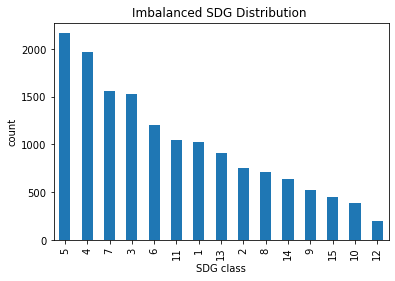

In [20]:
# graphical representaion of class distribution 
clean_train_df['sdg'].value_counts().plot(kind = 'bar')
plt.title('Imbalanced SDG Distribution ')
plt.xlabel('SDG class')
plt.ylabel('count')
plt.show()

In [21]:
#extract all words in the cleaned data
all_words = ' '.join(word for word in clean_train_df.text_lemmatized)
all_words

"['manufacturing', 'value', 'added', 'percentage', 'gdp', 'stood', 'per', 'cent', 'africa', 'excluding', 'north', 'africa', 'per', 'cent', 'north', 'africa', 'comparison', 'figure', 'per', 'cent', 'latin', 'america', 'caribbean', 'per', 'cent', 'least', 'developed', 'country', 'per', 'cent', 'asia', 'pacific', 'per', 'cent', 'globally', 'neither', 'north', 'africa', 'rest', 'africa', 'made', 'significant', 'progress', 'first', 'half', 'current', 'decade', 'manufacturing', 'value', 'added', 'percentage', 'gdp', 'increased', 'slightly', 'per', 'cent', 'period', 'africa', 'excluding', 'north', 'africa', 'per', 'cent', 'north', 'africa'] ['capacity', 'building', 'cf', 'text', 'adaptation', 'rather', 'conceptual', 'set', 'principle', 'adaptation', 'action', 'give', 'mechanism', 'action', 'adaptation', 'frame', 'provide', 'pa', 'appears', 'opportunity', 'agricultural', 'action', 'agreed', 'wording', 'pa', 'facilitate', 'support', 'concrete', 'action', 'decision', 'taken', 'use', 'opportunity

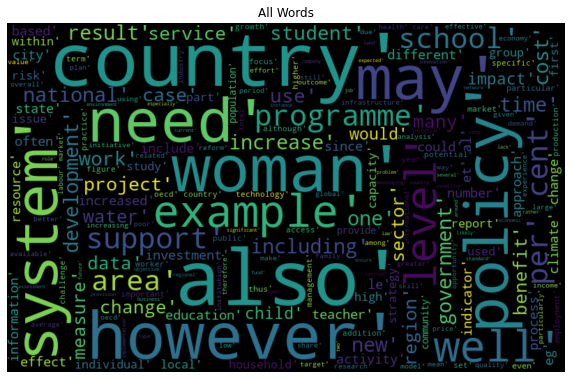

In [22]:
# Visualization of the data
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("All Words")
plt.axis('off')
plt.show()